In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r'Downloads\loan_data_1.csv')

data.fillna(0, inplace=True)  
data['Loan_Status'] = data['Loan_Status'].map({'Y': 1, 'N': 0})  

inputs = data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].values
outputs = data['Loan_Status'].values


np.random.seed(42)
weights = np.random.rand(inputs.shape[1])


def summation_unit(inputs, weights):
    return np.dot(inputs, weights)


def step_function(x):
    return 1 if x >= 0 else 0

def bipolar_step_function(x):
    return 1 if x >= 0 else -1

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def tanh_function(x):
    return np.tanh(x)

def relu_function(x):
    return max(0, x)

def leaky_relu_function(x, alpha=0.01):
    return x if x > 0 else alpha * x


def comparator_unit(predicted, actual):
    return np.mean((predicted - actual) ** 2)


predictions = []
activation_results = []

for i in range(len(inputs)):
    weighted_sum = summation_unit(inputs[i], weights)
    
  
    step_result = step_function(weighted_sum)
    sigmoid_result = sigmoid_function(weighted_sum)
    
   
    predictions.append(round(sigmoid_result))
    
    activation_results.append({
        "Step": step_result,
        "Sigmoid": sigmoid_result,
        "TanH": tanh_function(weighted_sum),
        "ReLU": relu_function(weighted_sum),
        "Leaky ReLU": leaky_relu_function(weighted_sum)
    })


predictions = np.array(predictions)
error = comparator_unit(predictions, outputs)


print("Sample Activation Results:", activation_results[:5])
print("Error (Mean Squared Error):", error)


Sample Activation Results: [{'Step': 1, 'Sigmoid': 1.0, 'TanH': 1.0, 'ReLU': 3243.889763295476, 'Leaky ReLU': 3243.889763295476}, {'Step': 1, 'Sigmoid': 1.0, 'TanH': 1.0, 'ReLU': 1171.93195670164, 'Leaky ReLU': 1171.93195670164}, {'Step': 1, 'Sigmoid': 1.0, 'TanH': 1.0, 'ReLU': 3297.0607345146886, 'Leaky ReLU': 3297.0607345146886}, {'Step': 1, 'Sigmoid': 1.0, 'TanH': 1.0, 'ReLU': 2350.4518588795827, 'Leaky ReLU': 2350.4518588795827}, {'Step': 1, 'Sigmoid': 1.0, 'TanH': 1.0, 'ReLU': 2384.624410260413, 'Leaky ReLU': 2384.624410260413}]
Error (Mean Squared Error): 0.2887139107611549


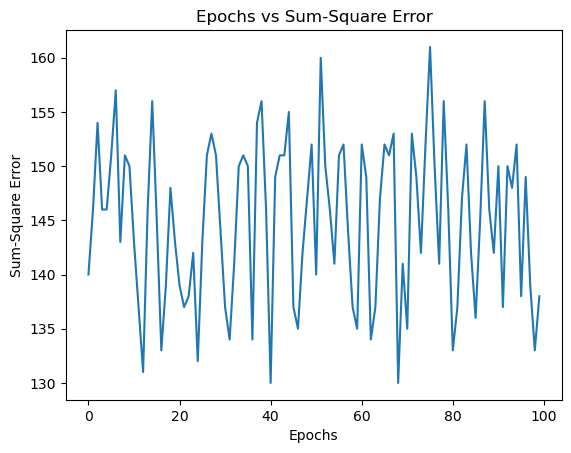

Final Weights: [ 6.000000e-01 -6.965000e+01 -1.253826e+03 -5.900000e+00]
Total Epochs: 100


In [5]:

W0 = 10  
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

weights = np.array([W0, W1, W2, 0]) 
def step_function(x):
    return 1 if x >= 0 else 0

def train_perceptron(inputs, outputs, weights, learning_rate, max_epochs=100):
    epochs = 0
    errors = []
    converged = False

    inputs_with_bias = np.c_[np.ones(inputs.shape[0]), inputs]  

    while not converged and epochs < max_epochs:
        total_error = 0
        converged = True

        for i in range(len(inputs)):
            weighted_sum = np.dot(inputs_with_bias[i], weights)
            
            prediction = step_function(weighted_sum)
            
            error = outputs[i] - prediction
            
            if error != 0:
                converged = False
                weights += learning_rate * error * inputs_with_bias[i]
                total_error += error ** 2  

        errors.append(total_error)
        epochs += 1

    return weights, epochs, errors

final_weights, epochs, errors = train_perceptron(inputs, outputs, weights, learning_rate)

plt.plot(range(epochs), errors)
plt.title("Epochs vs Sum-Square Error")
plt.xlabel("Epochs")
plt.ylabel("Sum-Square Error")
plt.show()

print("Final Weights:", final_weights)
print("Total Epochs:", epochs)


C:\Users\eswar\AppData\Local\Temp\ipykernel_14896\849354010.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


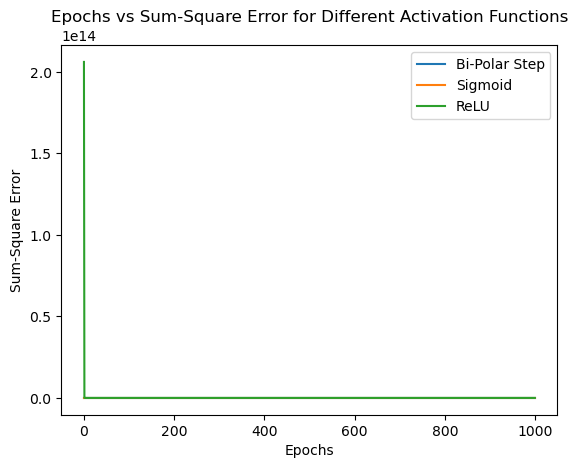

Bi-Polar Step - Final Weights: [ -45.8   527.2  -425.35   12.  ], Epochs: 1000
Sigmoid - Final Weights: [-85.89139143   4.4239225  201.3969651   -3.51860187], Epochs: 1000
ReLU - Final Weights: [-7.19768901e+05 -2.28016881e+07 -1.31589875e+09 -8.90317937e+07], Epochs: 1000


In [6]:

W0 = 10 
W1 = 0.2
W2 = -0.75
learning_rate = 0.05


initial_weights = np.array([W0, W1, W2, 0])  

def bipolar_step_function(x):
    return 1 if x >= 0 else -1

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def relu_function(x):
    return max(0, x)

def train_perceptron(inputs, outputs, weights, learning_rate, activation_function, max_epochs=1000, convergence_threshold=0.002):
    epochs = 0
    errors = []
    converged = False

    inputs_with_bias = np.c_[np.ones(inputs.shape[0]), inputs] 

    while not converged and epochs < max_epochs:
        total_error = 0
        converged = True

        for i in range(len(inputs)):
            weighted_sum = np.dot(inputs_with_bias[i], weights)
            
            prediction = activation_function(weighted_sum)
            
            error = outputs[i] - prediction
            
            if error != 0:
                converged = False
                weights += learning_rate * error * inputs_with_bias[i]
                total_error += error ** 2  

        errors.append(total_error)
        epochs += 1

        if total_error <= convergence_threshold:
            converged = True

    return weights, epochs, errors

activation_functions = {
    "Bi-Polar Step": bipolar_step_function,
    "Sigmoid": sigmoid_function,
    "ReLU": relu_function
}

results = {}

for name, activation_function in activation_functions.items():
    weights = initial_weights.copy() 
    final_weights, epochs, errors = train_perceptron(inputs, outputs, weights, learning_rate, activation_function)
    results[name] = {
        "Final Weights": final_weights,
        "Epochs": epochs,
        "Errors": errors
    }

    plt.plot(range(epochs), errors, label=name)

plt.title("Epochs vs Sum-Square Error for Different Activation Functions")
plt.xlabel("Epochs")
plt.ylabel("Sum-Square Error")
plt.legend()
plt.show()

for name, result in results.items():
    print(f"{name} - Final Weights: {result['Final Weights']}, Epochs: {result['Epochs']}")


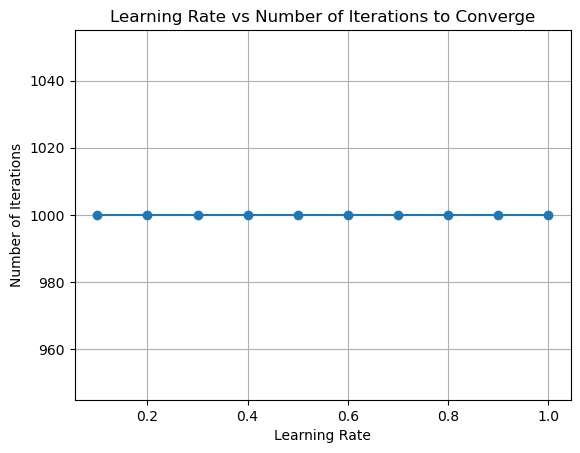

Learning Rate: 0.1, Epochs to Converge: 1000
Learning Rate: 0.2, Epochs to Converge: 1000
Learning Rate: 0.30000000000000004, Epochs to Converge: 1000
Learning Rate: 0.4, Epochs to Converge: 1000
Learning Rate: 0.5, Epochs to Converge: 1000
Learning Rate: 0.6000000000000001, Epochs to Converge: 1000
Learning Rate: 0.7000000000000001, Epochs to Converge: 1000
Learning Rate: 0.8, Epochs to Converge: 1000
Learning Rate: 0.9, Epochs to Converge: 1000
Learning Rate: 1.0, Epochs to Converge: 1000


In [12]:

W0 = 10  
W1 = 0.2
W2 = -0.75
initial_weights = np.array([W0, W1, W2, 0]) 

def step_function(x):
    return 1 if x >= 0 else 0

def train_perceptron(inputs, outputs, weights, learning_rate, activation_function, max_epochs=1000, convergence_threshold=0.002):
    epochs = 0
    converged = False

    inputs_with_bias = np.c_[np.ones(inputs.shape[0]), inputs] 

    while not converged and epochs < max_epochs:
        total_error = 0
        converged = True

        for i in range(len(inputs)):
            weighted_sum = np.dot(inputs_with_bias[i], weights)
            
            prediction = activation_function(weighted_sum)
            
            error = outputs[i] - prediction
            
            if error != 0:
                converged = False
                weights += learning_rate * error * inputs_with_bias[i]
                total_error += error ** 2  

        epochs += 1

        if total_error <= convergence_threshold:
            converged = True

    return weights, epochs

learning_rates = [0.1 * i for i in range(1, 11)]  # [0.1, 0.2, ..., 1.0]
iterations_to_converge = []

for lr in learning_rates:
    weights = initial_weights.copy()  
    _, epochs = train_perceptron(inputs, outputs, weights, lr, step_function)
    iterations_to_converge.append(epochs)

plt.plot(learning_rates, iterations_to_converge, marker='o')
plt.title("Learning Rate vs Number of Iterations to Converge")
plt.xlabel("Learning Rate")
plt.ylabel("Number of Iterations")
plt.grid(True)
plt.show()

for lr, epochs in zip(learning_rates, iterations_to_converge):
    print(f"Learning Rate: {lr}, Epochs to Converge: {epochs}")


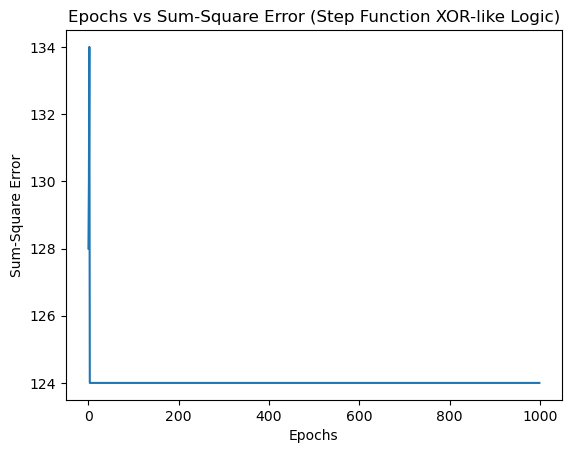

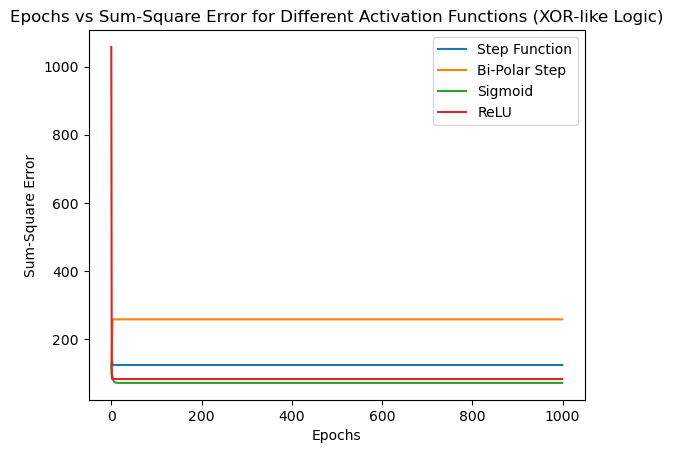

ValueError: too many values to unpack (expected 2)

In [15]:


mean_applicant_income = np.mean(inputs[:, 0])
mean_coapplicant_income = np.mean(inputs[:, 1])

# Now, iterate over the correct inputs and generate the binary inputs
binary_inputs = np.array([[1 if x > mean_applicant_income else 0, 1 if y > mean_coapplicant_income else 0] for x, y in inputs[:, :2]])

# XOR logic outputs based on the binary inputs
outputs = np.array([x[0] ^ x[1] for x in binary_inputs])

# Initial weights and learning rate
W0 = 10  # Bias weight
W1 = 0.2
W2 = -0.75
learning_rate = 0.05
initial_weights = np.array([W0, W1, W2])

# Activation Functions
def step_function(x):
    return 1 if x >= 0 else 0

def bipolar_step_function(x):
    return 1 if x >= 0 else -1

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def relu_function(x):
    return max(0, x)

# Perceptron training function with different activation functions
def train_perceptron(inputs, outputs, weights, learning_rate, activation_function, max_epochs=1000, convergence_threshold=0.002):
    epochs = 0
    converged = False
    errors = []

    # Add bias input to the input array
    inputs_with_bias = np.c_[np.ones(inputs.shape[0]), inputs]  # Add bias term (1) to inputs

    while not converged and epochs < max_epochs:
        total_error = 0
        converged = True

        # Iterate through each training sample
        for i in range(len(inputs)):
            # Calculate weighted sum
            weighted_sum = np.dot(inputs_with_bias[i], weights)
            
            # Apply activation function
            prediction = activation_function(weighted_sum)
            
            # Calculate error
            error = outputs[i] - prediction
            
            # If there is an error, update weights
            if error != 0:
                converged = False
                weights += learning_rate * error * inputs_with_bias[i]
                total_error += error ** 2  # Sum-squared error

        epochs += 1
        errors.append(total_error)

        # Check for convergence based on the threshold
        if total_error <= convergence_threshold:
            converged = True

    return weights, epochs, errors

# A1: Step function experiment for XOR-like logic
weights = initial_weights.copy()
final_weights, epochs, errors = train_perceptron(binary_inputs, outputs, weights, learning_rate, step_function)

# Plotting for Step function (A1)
plt.plot(range(epochs), errors)
plt.title("Epochs vs Sum-Square Error (Step Function XOR-like Logic)")
plt.xlabel("Epochs")
plt.ylabel("Sum-Square Error")
plt.show()

# A2: Activation function experiments for XOR-like logic
activation_functions = {
    "Step Function": step_function,
    "Bi-Polar Step": bipolar_step_function,
    "Sigmoid": sigmoid_function,
    "ReLU": relu_function
}

results = {}

for name, activation_function in activation_functions.items():
    weights = initial_weights.copy()  # Reset weights for each experiment
    final_weights, epochs, errors = train_perceptron(binary_inputs, outputs, weights, learning_rate, activation_function)
    results[name] = {
        "Final Weights": final_weights,
        "Epochs": epochs,
        "Errors": errors
    }

    # Plotting the epochs vs sum-square-error for each activation function
    plt.plot(range(epochs), errors, label=name)

# Display the plot
plt.title("Epochs vs Sum-Square Error for Different Activation Functions (XOR-like Logic)")
plt.xlabel("Epochs")
plt.ylabel("Sum-Square Error")
plt.legend()
plt.show()

# A3: Varying learning rates for XOR-like logic
learning_rates = [0.1 * i for i in range(1, 11)]  # [0.1, 0.2, ..., 1.0]
iterations_to_converge = []

# Run the experiment for each learning rate
for lr in learning_rates:
    weights = initial_weights.copy()  # Reset weights for each experiment
    _, epochs = train_perceptron(binary_inputs, outputs, weights, lr, step_function)
    iterations_to_converge.append(epochs)

# Plotting the learning rate vs number of epochs to converge (XOR-like logic)
plt.plot(learning_rates, iterations_to_converge, marker='o')
plt.title("Learning Rate vs Number of Iterations to Converge (XOR-like Logic)")
plt.xlabel("Learning Rate")
plt.ylabel("Number of Iterations")
plt.grid(True)
plt.show()

# Print the results for each learning rate
for lr, epochs in zip(learning_rates, iterations_to_converge):
    print(f"Learning Rate: {lr}, Epochs to Converge: {epochs}")


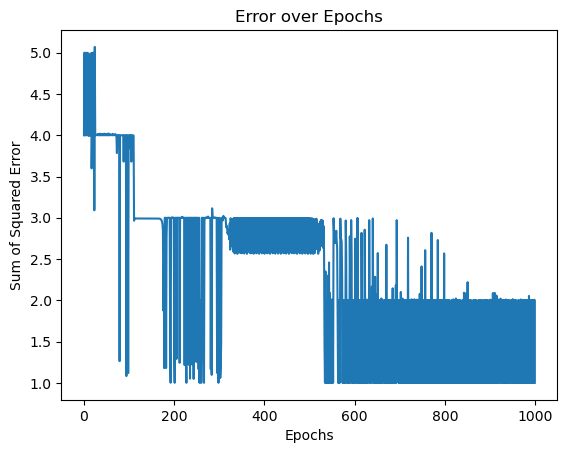

Final Weights: [-14.74602347  -0.88346135  -5.83177153   1.04928204]
Final Bias: -0.4798005089403183
Total Epochs: 1000
  Customer  High Value Tx?  Predicted High Value Tx?
0      C_1               1                         1
1      C_2               1                         1
2      C_3               1                         0
3      C_4               0                         0
4      C_5               1                         0
5      C_6               0                         0
6      C_7               1                         1
7      C_8               1                         1
8      C_9               0                         0
9     C_10               0                         0


In [17]:


# Define the customer data
data = {
    'Customer': ['C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7', 'C_8', 'C_9', 'C_10'],
    'Candies': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes': [6, 3, 6, 1, 4, 5, 4, 4, 4, 2],
    'Milk Packets': [2, 6, 2, 2, 2, 2, 2, 2, 4, 4],
    'Payment': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198],
    'High Value Tx?': ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No']
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Convert 'High Value Tx?' to binary (Yes -> 1, No -> 0)
df['High Value Tx?'] = df['High Value Tx?'].map({'Yes': 1, 'No': 0})

# Extract input features and target labels
X = df[['Candies', 'Mangoes', 'Milk Packets', 'Payment']].values
y = df['High Value Tx?'].values

# Initialize weights and bias
weights = np.random.rand(X.shape[1])  # Random initial weights for each feature
bias = np.random.rand()  # Random initial bias
learning_rate = 0.01
max_epochs = 1000

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function for backpropagation
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Training the perceptron
epochs = 0
errors = []

for epoch in range(max_epochs):
    total_error = 0
    
    # Iterate through each training sample
    for i in range(len(X)):
        # Calculate weighted sum
        weighted_sum = np.dot(X[i], weights) + bias
        
        # Apply the sigmoid activation function
        prediction = sigmoid(weighted_sum)
        
        # Calculate the error (difference between predicted and actual)
        error = y[i] - prediction
        
        # Adjust the weights and bias
        weights += learning_rate * error * sigmoid_derivative(prediction) * X[i]
        bias += learning_rate * error * sigmoid_derivative(prediction)
        
        # Sum the squared error for this epoch
        total_error += error ** 2
    
    epochs += 1
    errors.append(total_error)
    
    # Stop if error is very small
    if total_error < 0.01:
        break

# Plotting the error over epochs
plt.plot(range(epochs), errors)
plt.title('Error over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Error')
plt.show()

# Display the final weights and bias
print("Final Weights:", weights)
print("Final Bias:", bias)
print("Total Epochs:", epochs)

# Make predictions on the training data
predictions = sigmoid(np.dot(X, weights) + bias)
predictions = [1 if p >= 0.5 else 0 for p in predictions]

# Compare predicted results with actual results
df['Predicted High Value Tx?'] = predictions
print(df[['Customer', 'High Value Tx?', 'Predicted High Value Tx?']])


In [19]:

# Add a bias term (column of ones) to X
X_bias = np.hstack((np.ones((X.shape[0], 1)), X))  # Adding bias term

# Calculate the pseudo-inverse of X
pseudo_inverse = np.linalg.pinv(X_bias)

# Calculate the weights using the pseudo-inverse
weights_pseudo_inverse = np.dot(pseudo_inverse, y)

# Print the weights obtained using pseudo-inverse
print("Weights from Pseudo-Inverse Method:", weights_pseudo_inverse)

# Use the weights to predict the labels
predictions_pseudo_inverse = np.dot(X_bias, weights_pseudo_inverse)
predictions_pseudo_inverse = [1 if p >= 0.5 else 0 for p in predictions_pseudo_inverse]

# Add predictions to the DataFrame
df['Predicted High Value Tx? (Pseudo-Inverse)'] = predictions_pseudo_inverse

# Compare the actual vs predicted results
print(df[['Customer', 'High Value Tx?', 'Predicted High Value Tx? (Pseudo-Inverse)']])

# Compare with Perceptron results (Assuming perceptron predictions are stored in 'Predicted High Value Tx?')
df['Perceptron Predictions'] = predictions  # Use predictions from perceptron training here

# Display the results side by side
print(df[['Customer', 'High Value Tx?', 'Perceptron Predictions', 'Predicted High Value Tx? (Pseudo-Inverse)']])


Weights from Pseudo-Inverse Method: [-0.02027553 -0.02105885 -0.05987898 -0.0426245   0.00552511]
  Customer  High Value Tx?  Predicted High Value Tx? (Pseudo-Inverse)
0      C_1               1                                          1
1      C_2               1                                          1
2      C_3               1                                          1
3      C_4               0                                          0
4      C_5               1                                          1
5      C_6               0                                          0
6      C_7               1                                          1
7      C_8               1                                          1
8      C_9               0                                          0
9     C_10               0                                          0
  Customer  High Value Tx?  Perceptron Predictions  \
0      C_1               1                       1   
1      C_2              

In [23]:
import numpy as np
import pandas as pd

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Load the dataset (assuming you already uploaded the correct dataset)
data = pd.DataFrame({
    'Customer': ['C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7', 'C_8', 'C_9', 'C_10'],
    'Candies': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes': [6, 3, 6, 1, 4, 5, 4, 4, 4, 2],
    'Milk Packets': [2, 6, 2, 2, 2, 2, 2, 2, 4, 4],
    'Payment': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198],
    'High Value Tx?': ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No']
})

# Convert 'High Value Tx?' to binary (Yes -> 1, No -> 0)
data['High Value Tx?'] = data['High Value Tx?'].map({'Yes': 1, 'No': 0})

# Extract input features and target labels
X = data[['Candies', 'Mangoes', 'Milk Packets', 'Payment']].values
y = data['High Value Tx?'].values.reshape(-1, 1)

# Normalize the inputs (feature scaling)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Initialize network parameters
input_neurons = X.shape[1]  # 4 input features
hidden_neurons = 5  # Arbitrary choice
output_neurons = 1  # Binary classification

# Initialize weights and biases
np.random.seed(42)
weights_input_hidden = np.random.rand(input_neurons, hidden_neurons)
weights_hidden_output = np.random.rand(hidden_neurons, output_neurons)
bias_hidden = np.random.rand(1, hidden_neurons)
bias_output = np.random.rand(1, output_neurons)

# Set learning parameters
learning_rate = 0.05
max_epochs = 1000
error_threshold = 0.002

# Training loop for backpropagation
for epoch in range(max_epochs):
    # Forward pass
    # Input to hidden layer
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    
    # Hidden to output layer
    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)
    
    # Calculate the error
    error = y - final_output
    total_error = np.mean(np.square(error))  # Mean squared error
    
    # Backpropagation
    # Output layer error term
    output_error_term = error * sigmoid_derivative(final_output)
    
    # Hidden layer error term
    hidden_error_term = np.dot(output_error_term, weights_hidden_output.T) * sigmoid_derivative(hidden_output)
    
    # Update weights and biases
    weights_hidden_output += learning_rate * np.dot(hidden_output.T, output_error_term)
    bias_output += learning_rate * np.sum(output_error_term, axis=0, keepdims=True)
    
    weights_input_hidden += learning_rate * np.dot(X.T, hidden_error_term)
    bias_hidden += learning_rate * np.sum(hidden_error_term, axis=0, keepdims=True)
    
    # Check for convergence
    if total_error <= error_threshold:
        print(f"Convergence reached after {epoch+1} epochs with total error {total_error}")
        break

# Final weights and biases after training
print("Weights from input to hidden layer:\n", weights_input_hidden)
print("Weights from hidden to output layer:\n", weights_hidden_output)
print("Bias for hidden layer:", bias_hidden)
print("Bias for output layer:", bias_output)

# Testing the network on the same dataset
hidden_input_test = np.dot(X, weights_input_hidden) + bias_hidden
hidden_output_test = sigmoid(hidden_input_test)
final_input_test = np.dot(hidden_output_test, weights_hidden_output) + bias_output
final_output_test = sigmoid(final_input_test)

# Round output to get the predicted classification
predictions = np.round(final_output_test)
print("Predictions:\n", predictions)

# Compare actual vs predicted results
comparison = pd.DataFrame({
    'Customer': data['Customer'],
    'Actual High Value Tx': y.flatten(),
    'Predicted High Value Tx': predictions.flatten()
})

print(comparison)


Weights from input to hidden layer:
 [[-0.0092318   0.90952016  0.36350897  0.06449307 -0.31441068]
 [ 0.36609509 -0.23981683  0.79659796  0.56104989  0.713164  ]
 [ 0.02962076  1.07710207  0.63626889  0.20376527  0.10058406]
 [ 1.97780647 -1.17753957  1.82143865  2.15054661  2.51915987]]
Weights from hidden to output layer:
 [[ 1.68507743]
 [-1.97739243]
 [ 1.40104226]
 [ 1.88481913]
 [ 2.6488279 ]]
Bias for hidden layer: [[0.37296246 0.50645027 0.24611894 0.33607866 0.21503018]]
Bias for output layer: [[-1.86285687]]
Predictions:
 [[1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]]
  Customer  Actual High Value Tx  Predicted High Value Tx
0      C_1                     1                      1.0
1      C_2                     1                      1.0
2      C_3                     1                      1.0
3      C_4                     0                      0.0
4      C_5                     1                      1.0
5      C_6                     0                    